In [1]:
#Imporing dataset
import pandas as pd
import numpy as np

#visualization
import matplotlib as plt
import cufflinks as cf
cf.go_offline()

#Component selection
from sklearn.decomposition import PCA

#Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
application_train=pd.read_csv("D:\\Data Science\FDS-Bressan\Project\\application_train.csv")
application_test=pd.read_csv("D:\\Data Science\FDS-Bressan\Project\\application_test.csv")
#POS_CASH_balance = pd.read_csv('D:\\Data Science\FDS-Bressan\Project\\POS_CASH_balance.csv')
#bureau_balance = pd.read_csv('D:\\Data Science\FDS-Bressan\Project\\bureau_balance.csv')
#previous_application = pd.read_csv('D:\\Data Science\FDS-Bressan\Project\\previous_application.csv')
#installments_payments = pd.read_csv('D:\\Data Science\FDS-Bressan\Project\\installments_payments.csv')
#credit_card_balance = pd.read_csv('D:\\Data Science\FDS-Bressan\Project\\credit_card_balance.csv')
#bureau = pd.read_csv('D:\\Data Science\FDS-Bressan\Project\\bureau.csv')

### Checking the columns which has more null values so that we can drop them in order to reduce the number of independent variables

In [3]:
# Examine the missing values.
# Please note, we will just check the information on the missing values. 
# We will not remove any column as of now because we don't know which column is going to be important in future.
# Function to detect missing values.
def missing_info(dataframe):
    count=dataframe.isnull().sum()
  # standardised score of the missing values:
    mean_null=sum(count)/len(dataframe.columns)
    var_null=sum(((count-mean_null)**2))/len(dataframe.columns)
  # Make a table with the results
    metric=((count-mean_null)/var_null)*1000000
    result=pd.concat([count,metric],axis=1)
    result.columns=["count","standardised_score"]
    result=result[result.iloc[:,1] != 0].sort_values(
          'count', ascending=False).round(1)
    return(result.head())

In [4]:
missing_info(application_train)

,count,standardised_score
COMMONAREA_MEDI,214865,18.4
COMMONAREA_AVG,214865,18.4
COMMONAREA_MODE,214865,18.4
NONLIVINGAPARTMENTS_MODE,213514,18.2
NONLIVINGAPARTMENTS_AVG,213514,18.2


In [5]:
# The first hurdle we face is due to the columns with several categories. So, first we have to encode those columns to proceed further.
# Before that, let's have a look at the column types of the data sets.

#################### Function to check the column types #######################
def coltyp(dataframe):
    type=dataframe.dtypes.value_counts()
  #we will see number of unique categories for each object
    cat= dataframe.select_dtypes('object').apply(pd.Series.nunique,axis=0)
    print(type)
    return cat

In [6]:
coltyp(application_train)

float64    65
int64      41
object     16
dtype: int64


NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [7]:
# Now we have to conduct the one hot encoding:

from sklearn.preprocessing import LabelEncoder as le
def onehot(dataframe):
    df=pd.get_dummies(dataframe)
    print(df.shape)
    return(df)

In [8]:
application_train=onehot(application_train)

(307511, 246)


In [9]:
application_train.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(application_train)
application_train.loc[:]=imputer.transform(application_train)

In [ ]:
# Function to drop the empty cols 
def drop_col(dataframe,list_col):
    for i in dataframe.columns:
        if i in list_col:
            del dataframe[i]
    return dataframe

In [ ]:
drop_col(test, drop_cols_test)

### Distribution of AMT_CREDIT

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(application_train["AMT_CREDIT"])

### Distribution of AMT_INCOME_TOTAL

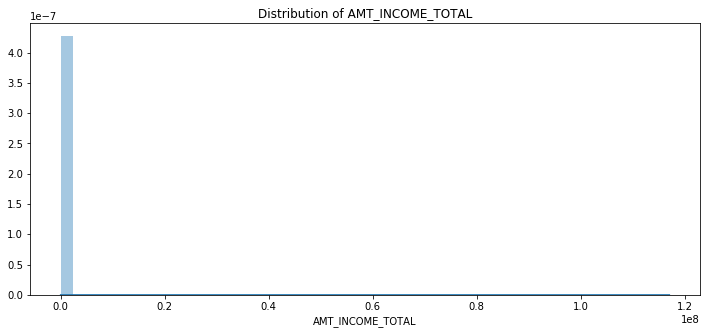

In [12]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_INCOME_TOTAL")
ax = sns.distplot(application_train["AMT_INCOME_TOTAL"].dropna())

### Data is balanced or imbalanced

In [15]:
temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Loan Repayed or not')

### Distribution of age with respect to the target value

Text(0.5, 1.0, 'age distribution')

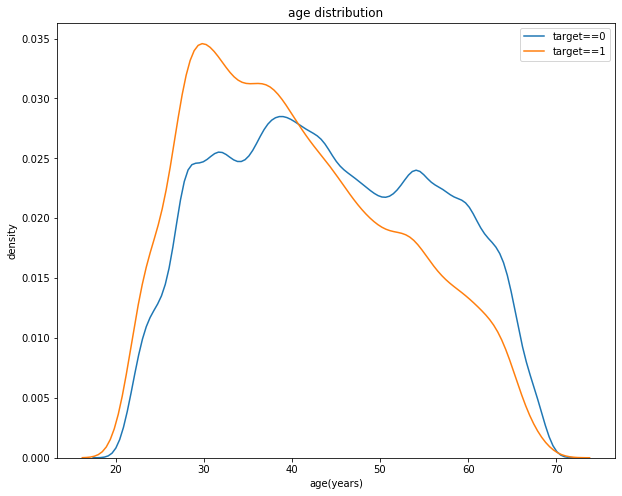

In [27]:
plt.figure(figsize=(10,8))
sns.kdeplot(application_train.loc[application_train['TARGET']==0,'DAYS_BIRTH']/365,label='target==0')
sns.kdeplot(application_train.loc[application_train['TARGET']==1,'DAYS_BIRTH']/365,label='target==1')
plt.xlabel('age(years)')
plt.ylabel('density')
plt.title('age distribution')

In [26]:
age_data=application_train[['DAYS_BIRTH','TARGET']]
age_data['YEAR_BIRTH']=age_data['DAYS_BIRTH']/365
age_data['YEAR_BIND']=pd.cut(age_data['YEAR_BIRTH'],bins=np.linspace(20,70,num=11))
age_data.head()

,DAYS_BIRTH,TARGET,YEAR_BIRTH,YEAR_BIND
0,9461.0,1.0,25.920548,"(25.0, 30.0]"
1,16765.0,0.0,45.931507,"(45.0, 50.0]"
2,19046.0,0.0,52.180822,"(50.0, 55.0]"
3,19005.0,0.0,52.068493,"(50.0, 55.0]"
4,19932.0,0.0,54.608219,"(50.0, 55.0]"


In [25]:
application_train["DAYS_BIRTH"]=-application_train["DAYS_BIRTH"]

Text(0.5, 1.0, 'Failure to Repay by Age Group')

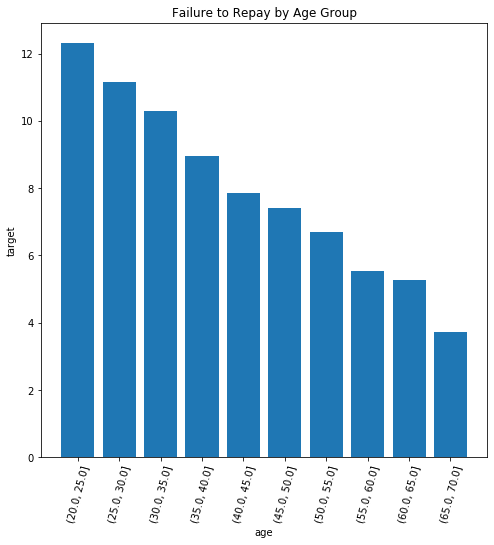

In [30]:
plt.figure(figsize=(8,8))
plt.bar(age_group.index.astype(str),100*age_group.TARGET)
plt.xticks(rotation=75)
plt.xlabel('age')
plt.ylabel('target')
plt.title('Failure to Repay by Age Group')

In [29]:
age_group=age_data.groupby('YEAR_BIND').mean()
age_group

,DAYS_BIRTH,TARGET,YEAR_BIRTH
YEAR_BIND,,,
"(20.0, 25.0]",8532.795625,0.123036,23.377522
"(25.0, 30.0]",10155.219250,0.111436,27.822518
"(30.0, 35.0]",11854.848377,0.102814,32.479037
"(35.0, 40.0]",13707.908253,0.089414,37.555913
"(40.0, 45.0]",15497.661233,0.078491,42.459346
"(45.0, 50.0]",17323.900441,0.074171,47.462741
"(50.0, 55.0]",19196.494791,0.066968,52.593136
"(55.0, 60.0]",20984.262742,0.055314,57.491131
"(60.0, 65.0]",22780.547460,0.052737,62.412459


### Occupation of Applicant's who applied for loan

In [37]:
temp = application_train["OCCUPATION_TYPE"].value_counts()
temp.iplot(kind='bar', xTitle = 'Occupation', yTitle = "Count", title = 'Occupation of Applicant\'s who applied for loan', color = 'green')

### Income sources of Application's who applied for loan

In [38]:
temp = application_train["NAME_INCOME_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Income sources of Applicant\'s', hole = 0.5)